<h4><b>1. Importing required Libraries and Packages</b></h4>

In [12]:
# Libraries
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipaddress
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE


<h4><b>2. Load the Dataset</b></h4>

In [6]:
# Load the chosen dataset
df = pd.read_csv("cybersecurity_attacks.csv", parse_dates=['Timestamp'])


<h4><b>3. Exploratory Analysis of Dataset<b></h4>

Dimension (No. of Rows, No. of Columns) of the Dataset:  (40000, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Timestamp               40000 non-null  datetime64[ns]
 1   Source IP Address       40000 non-null  object        
 2   Destination IP Address  40000 non-null  object        
 3   Source Port             40000 non-null  int64         
 4   Destination Port        40000 non-null  int64         
 5   Protocol                40000 non-null  object        
 6   Packet Length           40000 non-null  int64         
 7   Packet Type             40000 non-null  object        
 8   Traffic Type            40000 non-null  object        
 9   Payload Data            40000 non-null  object        
 10  Malware Indicators      20000 non-null  object        
 11  Anomaly Scores          40000 non-nul

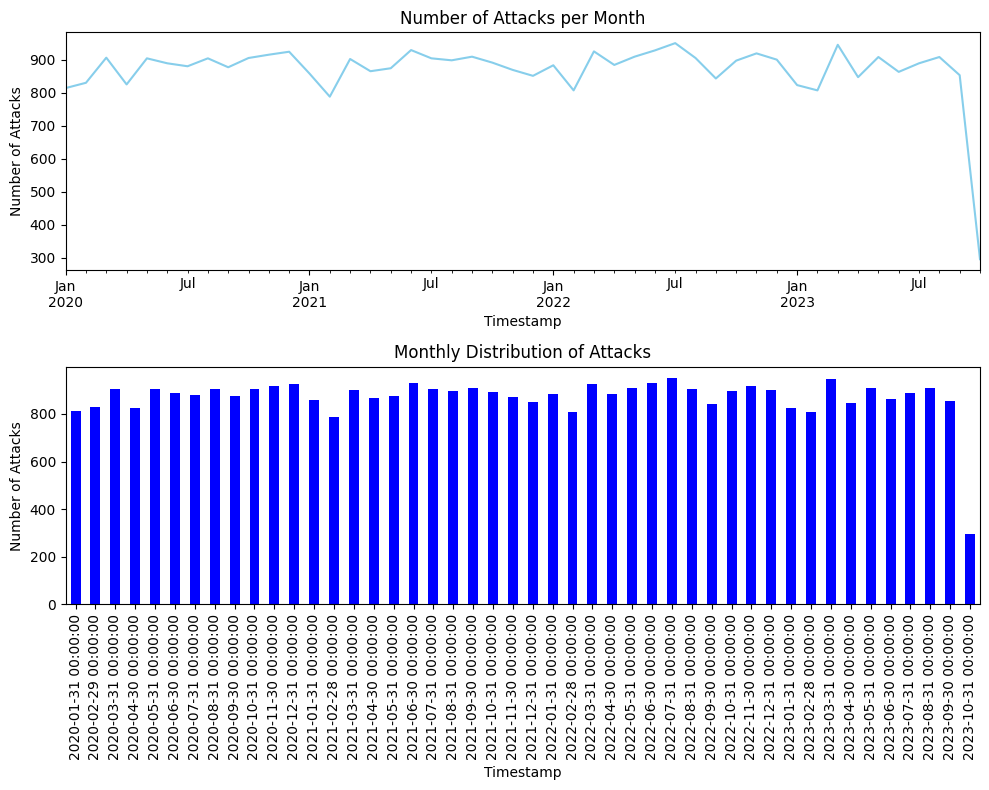

Summary of the No. of Attacks Year wise
 Attack Type  DDoS  Intrusion  Malware
Year                                 
2020         3533       3551     3489
2021         3545       3475     3518
2022         3558       3563     3629
2023         2792       2676     2671


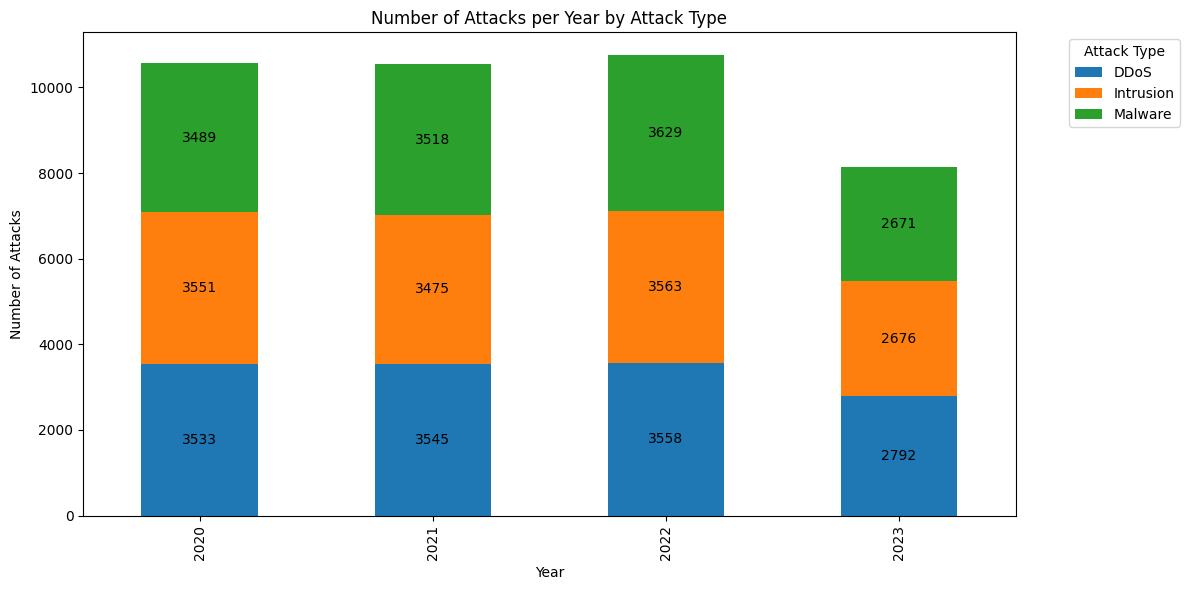

  Protocol Attack Type  COUNT
0     ICMP        DDoS   4508
6      UDP        DDoS   4482
2     ICMP     Malware   4461
1     ICMP   Intrusion   4460
3      TCP        DDoS   4438
5      TCP     Malware   4437
8      UDP     Malware   4409
7      UDP   Intrusion   4408
4      TCP   Intrusion   4397


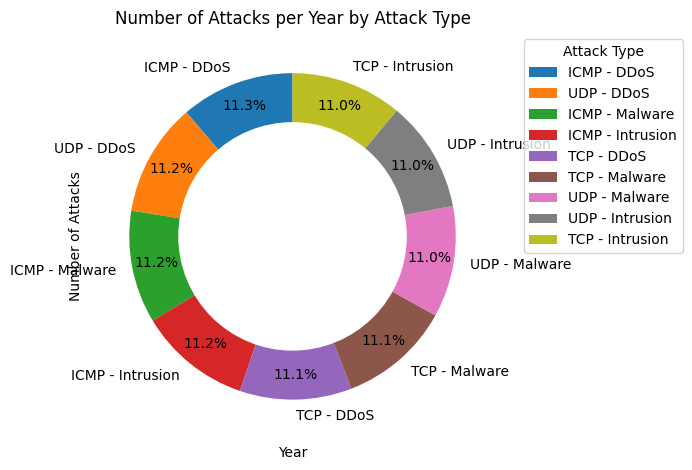

  Protocol Attack Type  COUNT
0     ICMP        DDoS   4508
6      UDP        DDoS   4482
2     ICMP     Malware   4461
1     ICMP   Intrusion   4460
3      TCP        DDoS   4438
5      TCP     Malware   4437
8      UDP     Malware   4409
7      UDP   Intrusion   4408
4      TCP   Intrusion   4397


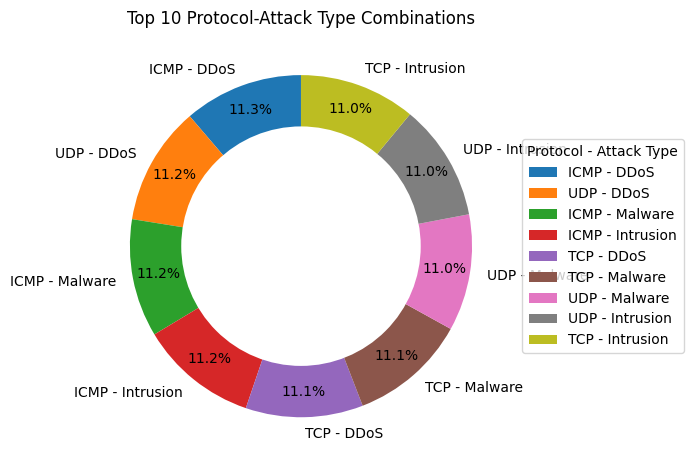

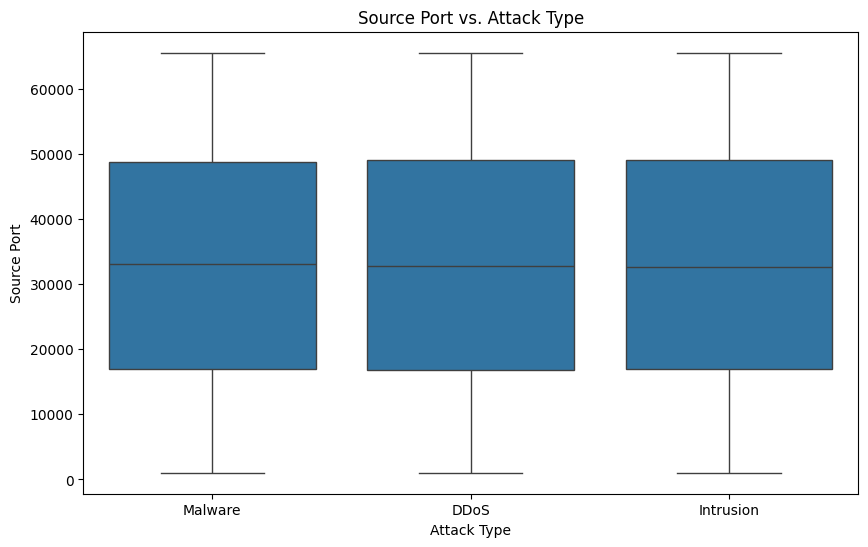

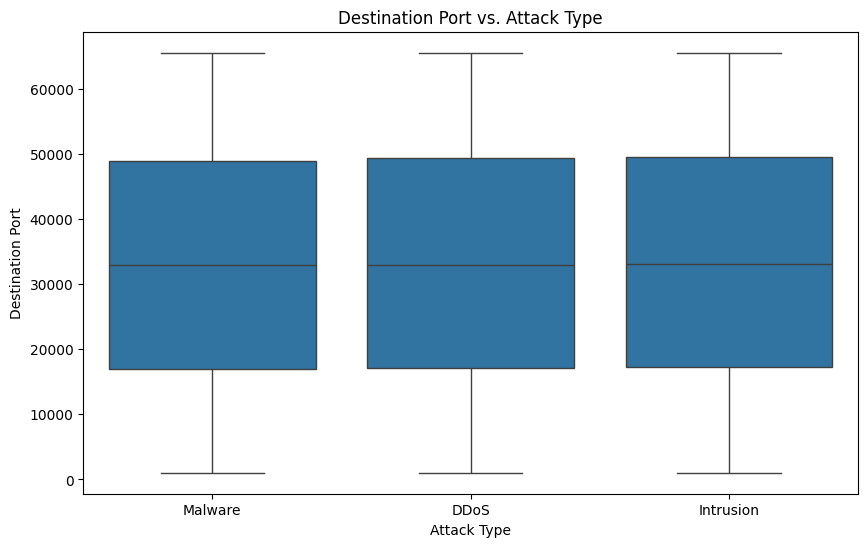

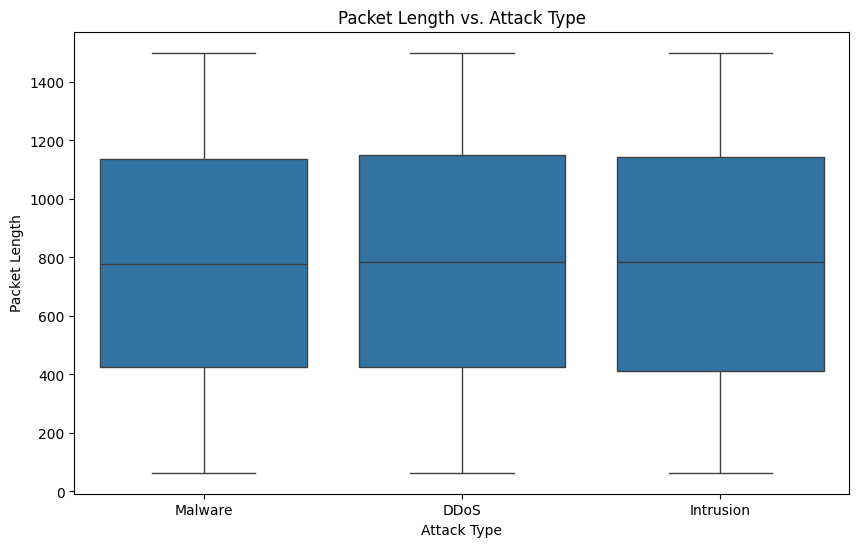

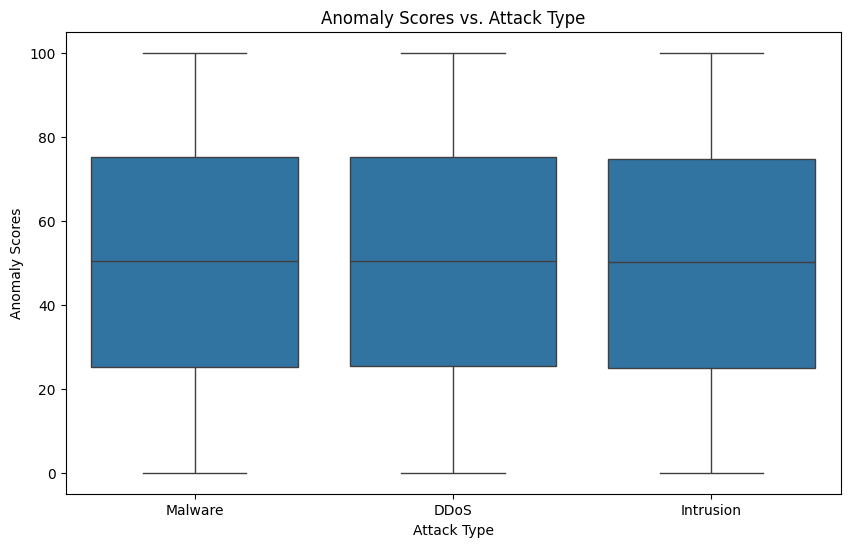

In [7]:
# Display the first 05 records in chosen dataset
df.head().T

# Dimension of the Dataset
print("Dimension (No. of Rows, No. of Columns) of the Dataset: ", df.shape)

# Dataset Information: Dimension, Column Names & its count, data types
df.info()

# Dataset Description: Statistical summary for numerical columns of the dataset
df.describe().T

# Frequency of Attacks
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
monthly_attacks = df.resample('ME', on='Timestamp')['Attack Type'].count()

print("Information on Frequency of Attacks")
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

monthly_attacks.plot(ax=ax[0], color='skyblue')
ax[0].set_title('Number of Attacks per Month')
ax[0].set_ylabel('Number of Attacks')

monthly_attacks.plot(kind='bar', ax=ax[1], color='blue')
ax[1].set_title('Monthly Distribution of Attacks')
ax[1].set_ylabel('Number of Attacks')

plt.tight_layout()
plt.show()

# Number of Attacks per year
df['Year'] = df['Timestamp'].dt.year
# Group by YEAR and ATTACK TYPE, count occurrences
attack_counts = df.groupby(['Year', 'Attack Type']).size().unstack(fill_value=0)

# Print a summary of the data
print("Summary of the No. of Attacks Year wise\n", attack_counts)

# Plot the data
ax = attack_counts.plot(kind='bar', stacked=True, figsize=(12, 6))

# Customize the plot
plt.title('Number of Attacks per Year by Attack Type')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Add value labels on the bars
for c in ax.containers:
    ax.bar_label(c, label_type='center')

# Show the plot
plt.show()


# Count occurrences of each combination of PROTOCOL and ATTACK TYPE
protocol_attack_counts = df.groupby(['Protocol', 'Attack Type']).size().reset_index(name='COUNT')

# Sort by count in descending order and take top 10 for better visibility
top_10 = protocol_attack_counts.sort_values('COUNT', ascending=False).head(10)

# Print a summary of the data
print(top_10)

# Create a pie chart
# ax = attack_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.plot(figsize=(12, 8))
plt.pie(top_10['COUNT'], labels=top_10.apply(lambda x: f"{x['Protocol']} - {x['Attack Type']}", axis=1),
        autopct='%1.1f%%', startangle=90, pctdistance=0.85)

# Add a circle at the center to create a donut chart (optional)
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Customize the plot
plt.title('Number of Attacks per Year by Attack Type')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Add value labels on the bars
for c in ax.containers:
    ax.bar_label(c, label_type='center')

# Show the plot
plt.show()


# Count occurrences of each combination of PROTOCOL and ATTACK TYPE
protocol_attack_counts = df.groupby(['Protocol', 'Attack Type']).size().reset_index(name='COUNT')

# Sort by count in descending order and take top 10 for better visibility
top_10 = protocol_attack_counts.sort_values('COUNT', ascending=False).head(10)

# Print a summary of the data
print(top_10)

# Create a pie chart
# ax = attack_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.plot(figsize=(12, 8))
plt.pie(top_10['COUNT'], labels=top_10.apply(lambda x: f"{x['Protocol']} - {x['Attack Type']}", axis=1),
        autopct='%1.1f%%', startangle=90, pctdistance=0.85)

# Add a circle at the center to create a donut chart (optional)
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Add title
plt.title('Top 10 Protocol-Attack Type Combinations')

# Add legend
plt.legend(title='Protocol - Attack Type', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()


# Explore relationships between features and the target variable
# Select some features for visualization. Adjust based on actual features in your dataset.
features = ['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores']

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Attack Type', y=feature, data=df)
    plt.title(f'{feature} vs. Attack Type')
    plt.xlabel('Attack Type')
    plt.ylabel(feature)
    plt.show()



<h4><b>4. Dataset Preparation for Model Training</b></h4>

<h3>Data Pre-Processing</h3>

In [8]:
# Handling Missing values: Identify the columns with missing values and fill with 0

# Get column names with missing values
columns_with_missing = df.columns[df.isnull().any()].tolist()

# Print the result
print("Columns with missing values:")
for column in columns_with_missing:
    print(column)

# If you want to also see the count of missing values:
print("\nColumns with missing values and their counts:")
for column in columns_with_missing:
    missing_count = df[column].isnull().sum()
    print(f"{column}: {missing_count}")

# Fill the missing values with 0
df = df.fillna(0)

df.info()


# Convert some of the dataset values into integer

# Convert the Timestamp into UNIX Epochs time which is in a long integer format
print("Timestamp values in YYYY-MM-DD HH:MM:SS format, \n", df['Timestamp'])

# Convert the IP Addresses (Source IP Address & Destination IP Address) in the chosen Dataset into Integers
print("Before conversion the IP Addresses in the Dataset: \n", df.head())

def ip_to_int(ip):
    return int(ipaddress.ip_address(ip))

df['Destination IP Address'] = df['Destination IP Address'].apply(ip_to_int)
df['Source IP Address'] = df['Source IP Address'].apply(ip_to_int)

print("After conversion the IP Addresses in the Dataset: \n", df.head())

df.head(2).T

# Replace certain values with 1 for the columns where Firewall Logs value is 'Log Data',
# Malware Indicators value is 'IoC Detected' & Alerts/Warnings value is 'Alert Triggered'

df['Firewall Logs'] = df['Firewall Logs'].replace('Log Data', 1)
df['Malware Indicators'] = df['Malware Indicators'].replace('IoC Detected', 1)
df['Alerts/Warnings'] = df['Alerts/Warnings'].replace('Alert Triggered', 1)

print("After replacing certain values of columns: Firewall Log, Malware Indicators & Alerts/Warning with 1,\n")
df.head(2).T

# Drop columns: IDS/IPS Alerts and Proxy Information as these two feature has no valid contribution in our model
print("Dimension of Chosen Dataset: ", df.shape)
df = df.drop(columns=['IDS/IPS Alerts', 'Proxy Information', 'Year'])
print("Processed Dataset Dimension is, ", df.shape)


# Hot Encoding or Label Encoding, Converting the categorical values into numerical values
le = LabelEncoder()
df['Attack Type'] = le.fit_transform(df['Attack Type'])
df['Log Source'] = le.fit_transform(df['Log Source'])
df['Attack Signature'] = le.fit_transform(df['Attack Signature'])
df['Action Taken'] = le.fit_transform(df['Action Taken'])
df['Severity Level'] = le.fit_transform(df['Severity Level'])
df['User Information'] = le.fit_transform(df['User Information'])
df['Device Information'] = le.fit_transform(df['Device Information'])
df['Network Segment'] = le.fit_transform(df['Network Segment'])
df['Protocol'] = le.fit_transform(df['Protocol'])
df['Geo-location Data'] = le.fit_transform(df['Geo-location Data'])
df['Packet Type'] = le.fit_transform(df['Packet Type'])
df['Traffic Type'] = le.fit_transform(df['Traffic Type'])
df['Payload Data'] = le.fit_transform(df['Payload Data'])

df.info()

# Calculate the number of attacks using class variable: Attack Type

if 'Attack Type' in df.columns:
    attack_counts = df['Attack Type'].value_counts()

    if not attack_counts.empty:
        le = LabelEncoder()
        le.fit(df['Attack Type'])

        class_names = le.inverse_transform(attack_counts.index)

        print("Attacks detected:")

attack_counts = df['Attack Type'].value_counts()

num_unique_attack_types = attack_counts.nunique()
print(f"Number of unique Attack Types: {num_unique_attack_types}")

class_names = {
    0: "DDoS",
    1: "Intrusion",
    2: "Malware"
}

print("Unique Attack Types and their Counts:")
for attack_type, count in attack_counts.items():
    class_name = class_names.get(attack_type, "Unknown Class")
    print(f"{class_name} ({attack_type}): {count}")


Columns with missing values:
Malware Indicators
Alerts/Warnings
Proxy Information
Firewall Logs
IDS/IPS Alerts

Columns with missing values and their counts:
Malware Indicators: 20000
Alerts/Warnings: 20067
Proxy Information: 19851
Firewall Logs: 19961
IDS/IPS Alerts: 20050
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Timestamp               40000 non-null  datetime64[ns]
 1   Source IP Address       40000 non-null  object        
 2   Destination IP Address  40000 non-null  object        
 3   Source Port             40000 non-null  int64         
 4   Destination Port        40000 non-null  int64         
 5   Protocol                40000 non-null  object        
 6   Packet Length           40000 non-null  int64         
 7   Packet Type             40000 non-null  object        
 8   Traffic Typ

C:\Users\Bandit\AppData\Local\Temp\ipykernel_20080\1983347494.py:44: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Firewall Logs'] = df['Firewall Logs'].replace('Log Data', 1)
C:\Users\Bandit\AppData\Local\Temp\ipykernel_20080\1983347494.py:45: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Malware Indicators'] = df['Malware Indicators'].replace('IoC Detected', 1)
C:\Users\Bandit\AppData\Local\Temp\ipykernel_20080\1983347494.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a futur

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Timestamp               40000 non-null  datetime64[ns]
 1   Source IP Address       40000 non-null  int64         
 2   Destination IP Address  40000 non-null  int64         
 3   Source Port             40000 non-null  int64         
 4   Destination Port        40000 non-null  int64         
 5   Protocol                40000 non-null  int64         
 6   Packet Length           40000 non-null  int64         
 7   Packet Type             40000 non-null  int64         
 8   Traffic Type            40000 non-null  int64         
 9   Payload Data            40000 non-null  int64         
 10  Malware Indicators      40000 non-null  int64         
 11  Anomaly Scores          40000 non-null  float64       
 12  Alerts/Warnings         40000 non-null  int64 

<h3>Data Balancing usng SMOTE, Data Augmentationkeyboard</h3>

Dimension of the Dataset:  (40000, 23)
Dimension of Feature Variables (X):  (40000, 22) Dimension of Target Variable (y):  (40000,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399998 entries, 0 to 399997
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Timestamp               399998 non-null  float64
 1   Source IP Address       399998 non-null  float64
 2   Destination IP Address  399998 non-null  float64
 3   Source Port             399998 non-null  float64
 4   Destination Port        399998 non-null  float64
 5   Protocol                399998 non-null  float64
 6   Packet Length           399998 non-null  float64
 7   Packet Type             399998 non-null  float64
 8   Traffic Type            399998 non-null  float64
 9   Payload Data            399998 non-null  float64
 10  Malware Indicators      399998 non-null  float64
 11  Anomaly Scores          399998 non-null  float64
 

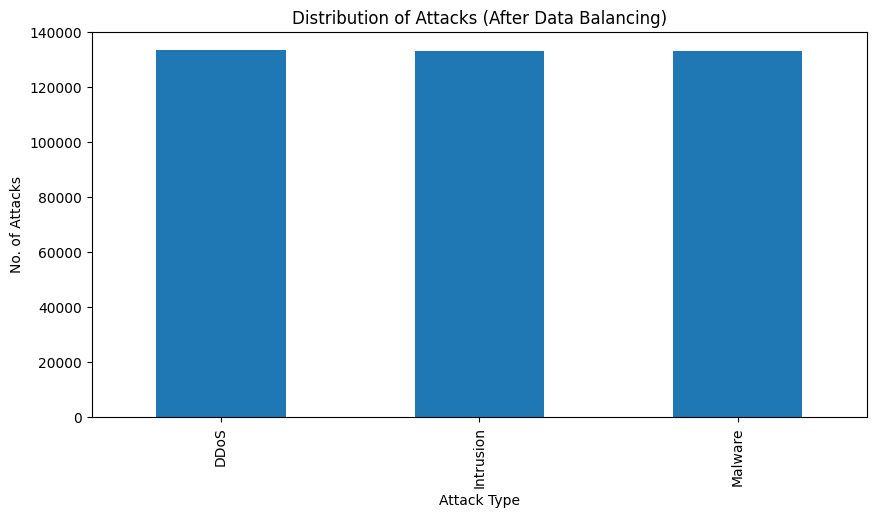

In [13]:
os.environ['LOKY_MAX_CPU_COUNT'] = '4'
warnings.filterwarnings("ignore")

df['Timestamp'] = df['Timestamp'].astype('int64')

X = df.drop(columns=['Attack Type'])
y = df['Attack Type']

print("Dimension of the Dataset: ", df.shape)
print("Dimension of Feature Variables (X): ", X.shape, "Dimension of Target Variable (y): ", y.shape)

target_size = 200000
class_counts = y.value_counts().to_dict()
total_samples_needed = target_size - len(y)
samples_per_class = {
    cls: count + total_samples_needed // len(class_counts)
    for cls, count in class_counts.items()
}

smote = SMOTE(sampling_strategy=samples_per_class, random_state=42)
X_res, y_res = smote.fit_resample(X, y)

def add_noise(dataframe, noise_level=0.01):
    noise = np.random.rand(*dataframe.shape) * noise_level
    dataframe_noisy = dataframe + noise
    return dataframe_noisy

numerical_columns = X_res.select_dtypes(include=[np.number]).columns
X_res_noisy = add_noise(X_res[numerical_columns])

X_augmented = pd.concat([X_res, X_res_noisy], ignore_index=True)
Y_augmented = pd.concat([y_res, y_res], ignore_index=True)

df_resampled = X_augmented.copy()
df_resampled['Attack Type'] = Y_augmented

df_resampled.info()
print("Number of Attack Classes: ", df_resampled['Attack Type'].unique())
print("\nNumber of Samples for each Attack Class: ", df_resampled['Attack Type'].value_counts())

plt.figure(figsize=(10, 5))
df_resampled['Attack Type'].value_counts().plot(kind='bar')
plt.xticks([0, 1, 2], ['DDoS', 'Intrusion', 'Malware'])
plt.ylabel('No. of Attacks')
plt.title("Distribution of Attacks (After Data Balancing)")
plt.show()

<h3>Splitting the Dataset into Training Set and Testing set</h3>

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_resampled.drop(columns=['Attack Type']),
    df_resampled['Attack Type'],
    test_size=0.2,
    random_state=42
)

print("After Splitting the Dataset,\nDimensions of TRAINING SET: ", X_train.shape, y_train.shape)
print("Dimensions of TESTING SET: ", X_test.shape, y_test.shape)

X_train.head(2)
y_train.head(2)
X_test.head(2)
y_test.head(2)


After Splitting the Dataset,
Dimensions of TRAINING SET:  (319998, 22) (319998,)
Dimensions of TESTING SET:  (80000, 22) (80000,)


242139    0
225458    1
Name: Attack Type, dtype: int64

<h3>Data Standardization or Normalizationkeyboard</h3>

In [15]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print("After Feature Scaling,\nDimensions of TRAINING SET: ", X_train.shape, y_train.shape)
print("Dimensions of TESTING SET: ", X_test.shape, y_test.shape)


After Feature Scaling,
Dimensions of TRAINING SET:  (319998, 22) (319998, 3)
Dimensions of TESTING SET:  (80000, 22) (80000, 3)


<h4><b>Problem: Dividing the data into three different sets</b></h4>

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# Split into Train (70%) and Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    df_resampled.drop(columns=['Attack Type']),
    df_resampled['Attack Type'],
    test_size=0.3,
    random_state=42
)

# Split Temp into Validation (15%) and Test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,
    random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# One-hot encoding the labels
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)

# Display shapes
print("TRAINING SET:     ", X_train.shape, y_train.shape)
print("VALIDATION SET:   ", X_val.shape, y_val.shape)
print("TEST SET:         ", X_test.shape, y_test.shape)


TRAINING SET:      (279998, 22) (279998, 3)
VALIDATION SET:    (60000, 22) (60000, 3)
TEST SET:          (60000, 22) (60000, 3)
